In [4]:
from google.colab import drive
import kagglehub
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


#download and laod dataset

In [5]:

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 6.17MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [6]:
datasets_folder_path = '/content/drive/My Drive/Datasets'
insurance_folder_path = os.path.join(datasets_folder_path,'Insurance Cost')

os.makedirs(insurance_folder_path, exist_ok=True)

for filename in os.listdir(path):
    shutil.move(os.path.join(path,filename), os.path.join(insurance_folder_path, filename))

print("Dataset files downloaded to:", insurance_folder_path)


Dataset files downloaded to: /content/drive/My Drive/Datasets/Insurance Cost


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Insurance Cost/insurance.csv')

#analyze dataset and visualization

In [9]:
df.shape

(1338, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [15]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


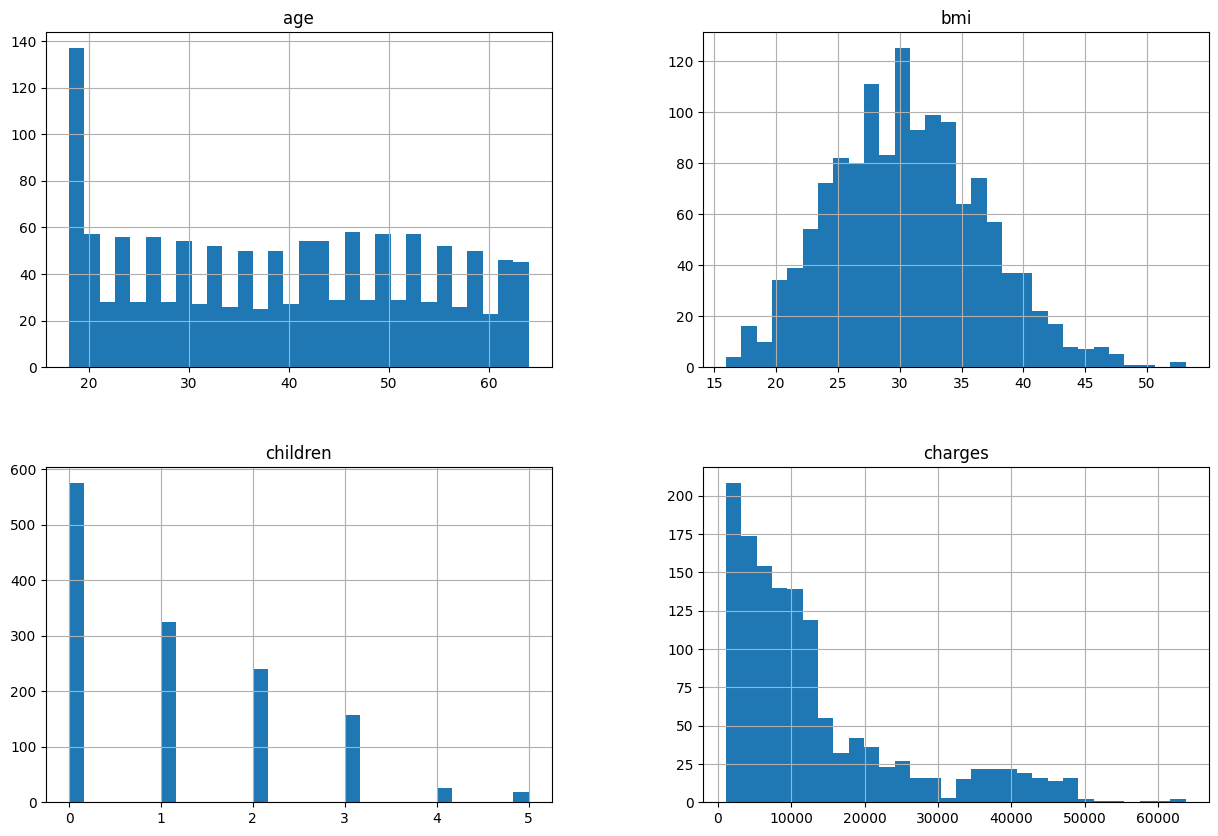

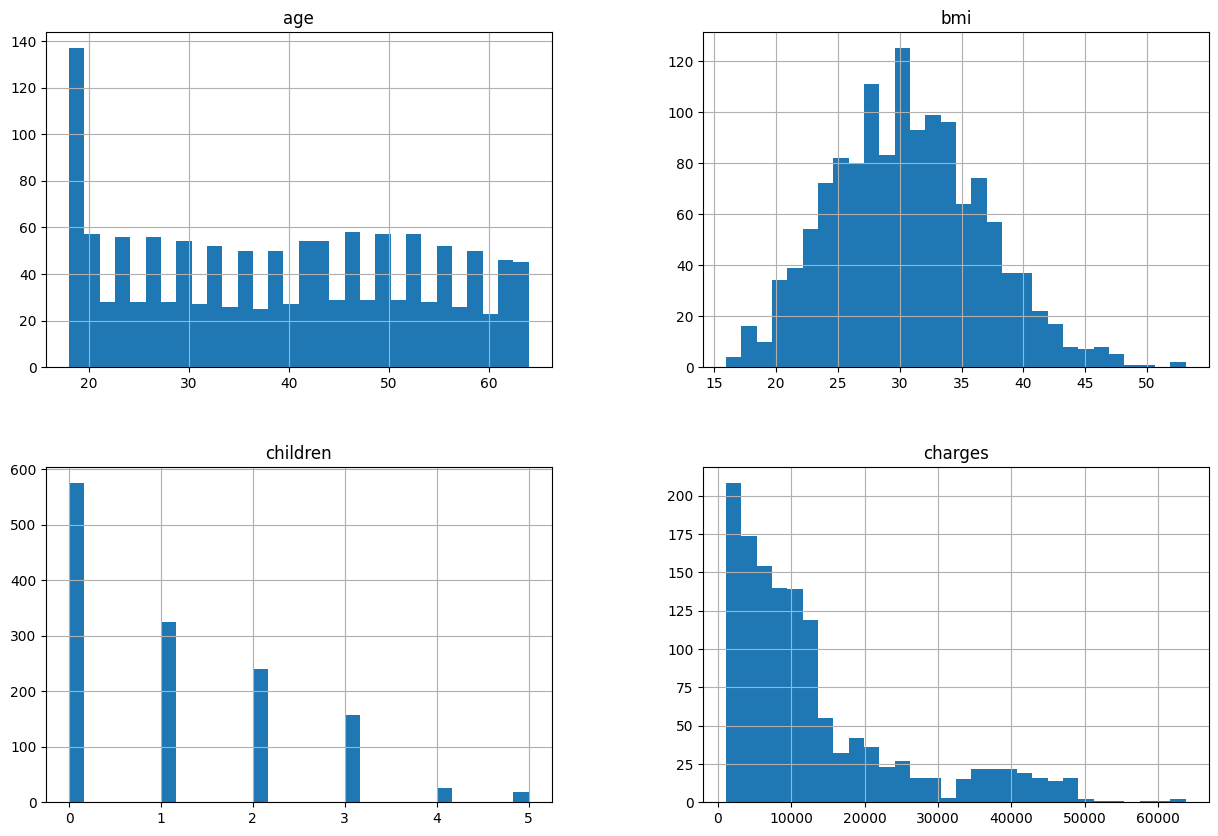

In [18]:
# Visualize the distribution of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.show()



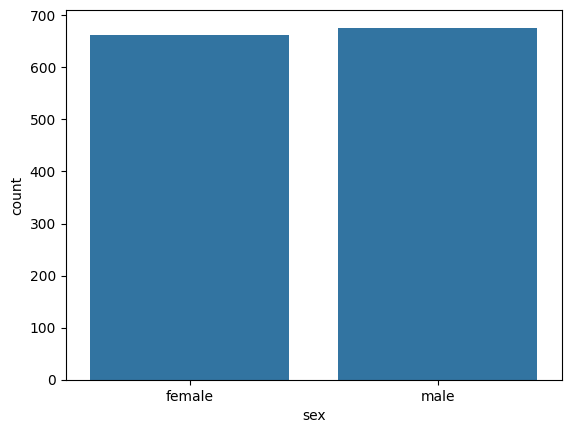

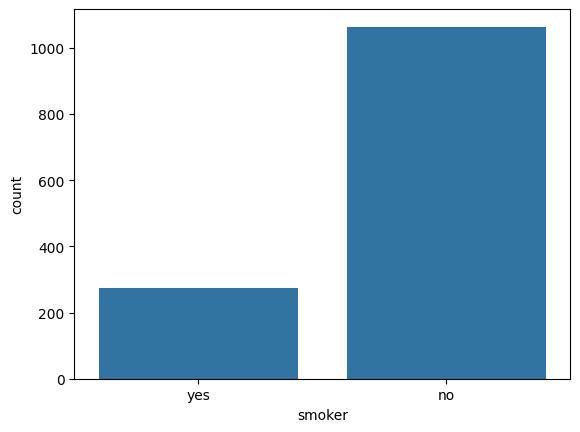

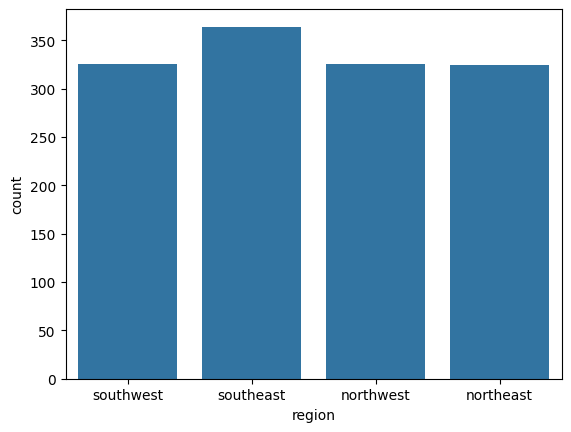

In [19]:
# Visualize the distribution of categorical features
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.show()


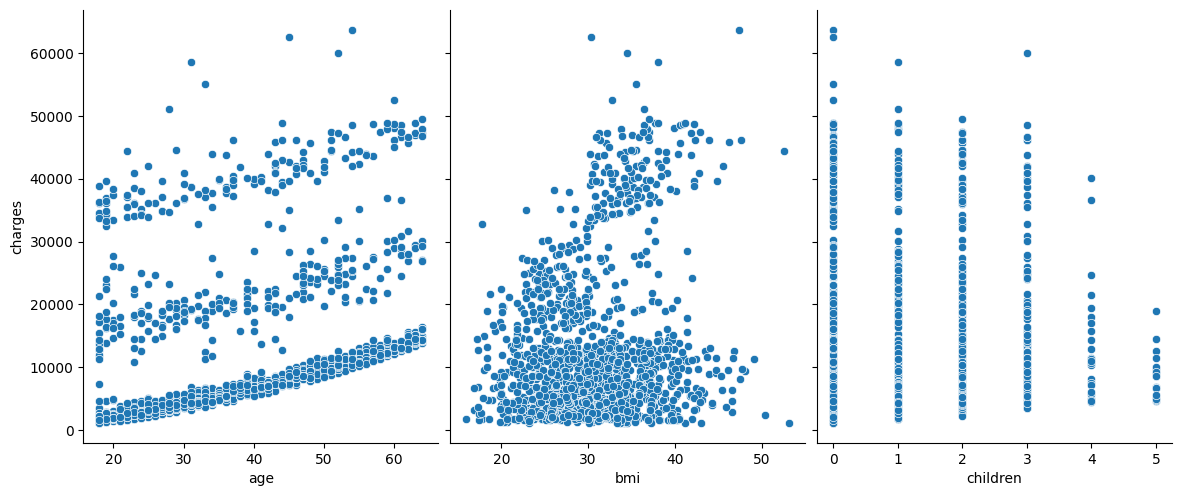

In [20]:

# Visualize the relationship between features and target variable
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars=['charges'], height=5, aspect=0.8)
plt.show()

In [21]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display the first few rows after encoding
print(df.head())



   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [22]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [23]:
# Normalize numerical features (optional, depending on the model)

# Initialize the scaler
scaler = StandardScaler()

# Normalize numerical columns
numerical_cols = ['age', 'bmi', 'children']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows after normalization
print(df.head())

        age       bmi  children      charges  sex_male  smoker_yes  \
0 -1.438764 -0.453320 -0.908614  16884.92400     False        True   
1 -1.509965  0.509621 -0.078767   1725.55230      True       False   
2 -0.797954  0.383307  1.580926   4449.46200      True       False   
3 -0.441948 -1.305531 -0.908614  21984.47061      True       False   
4 -0.513149 -0.292556 -0.908614   3866.85520      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


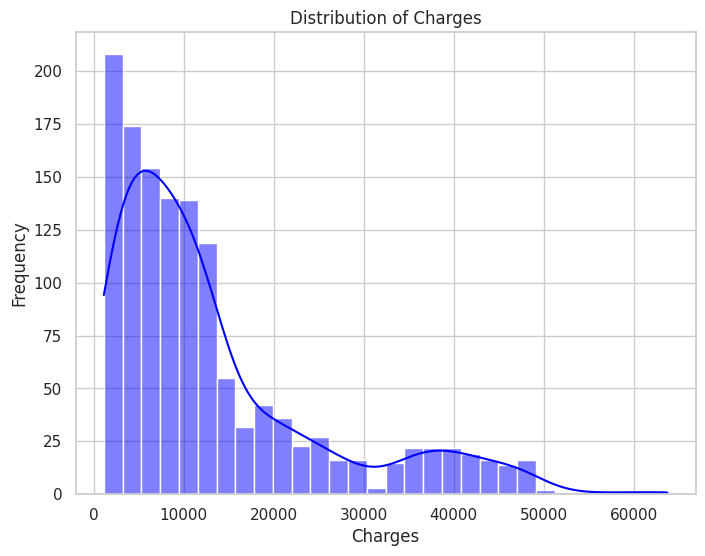

In [24]:

# Set the style for plots
sns.set(style="whitegrid")

# 1. Distribution of the target variable (charges)
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='blue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()



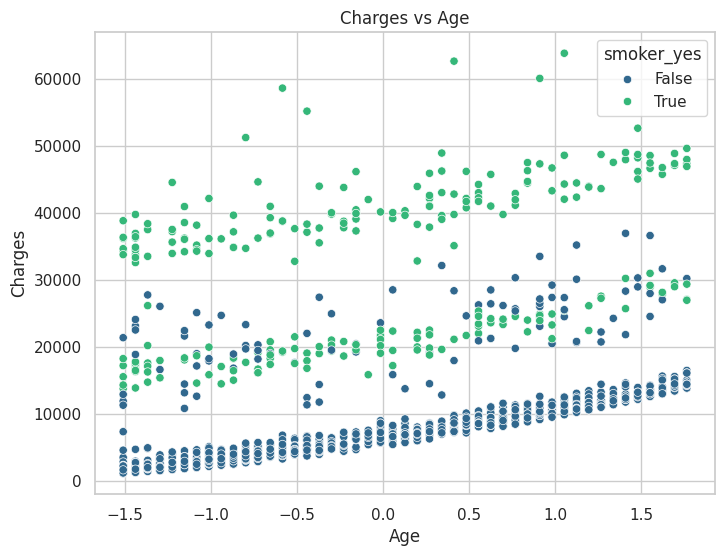

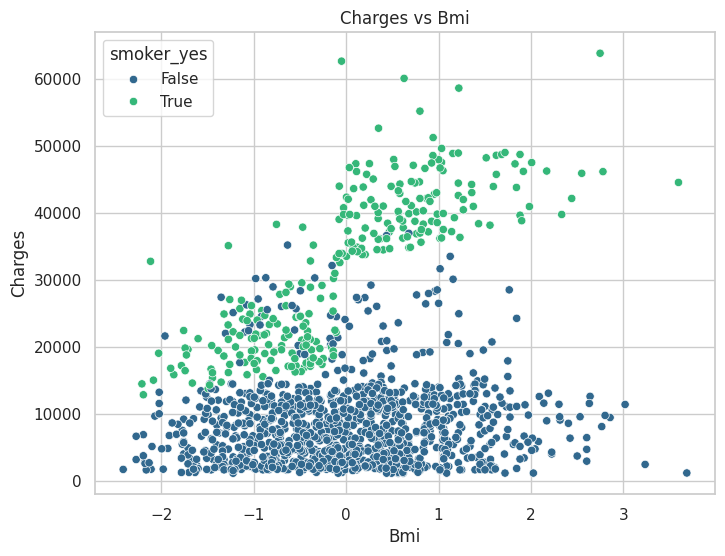

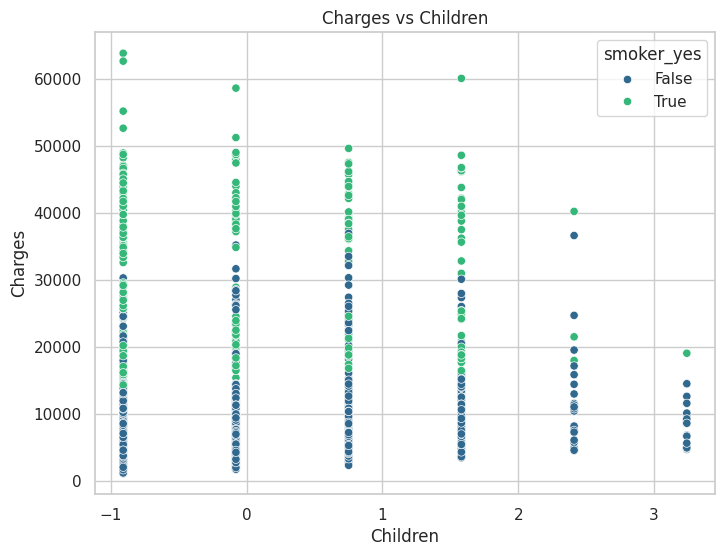

In [25]:
# 2. Relationship between numerical features and charges
numerical_features = ['age', 'bmi', 'children']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['charges'], hue=df['smoker_yes'], palette='viridis')
    plt.title(f'Charges vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Charges')
    plt.show()



<ipython-input-28-be36d8588b45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['charges'], palette='coolwarm')


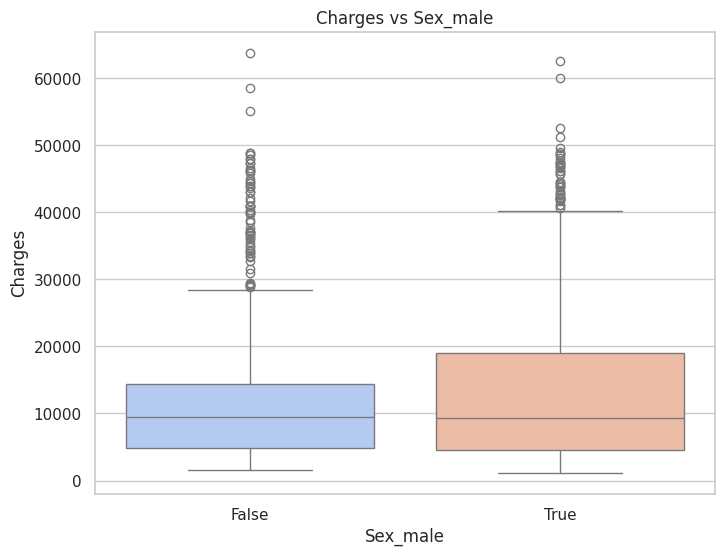

<ipython-input-28-be36d8588b45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['charges'], palette='coolwarm')


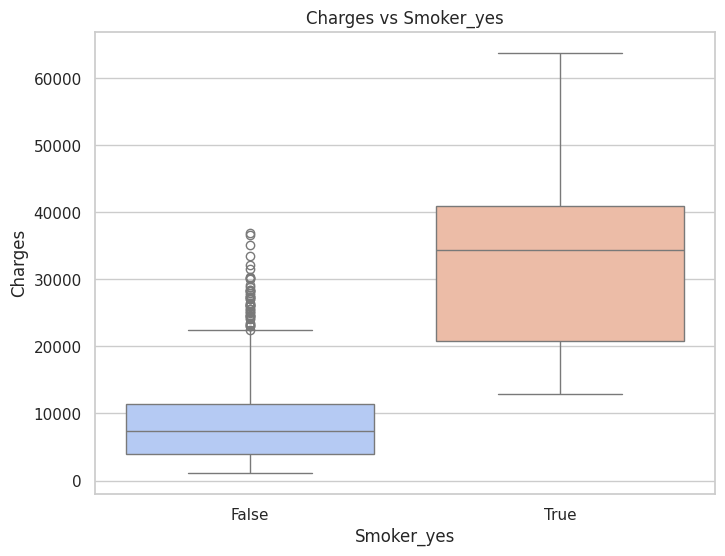

<ipython-input-28-be36d8588b45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['charges'], palette='coolwarm')


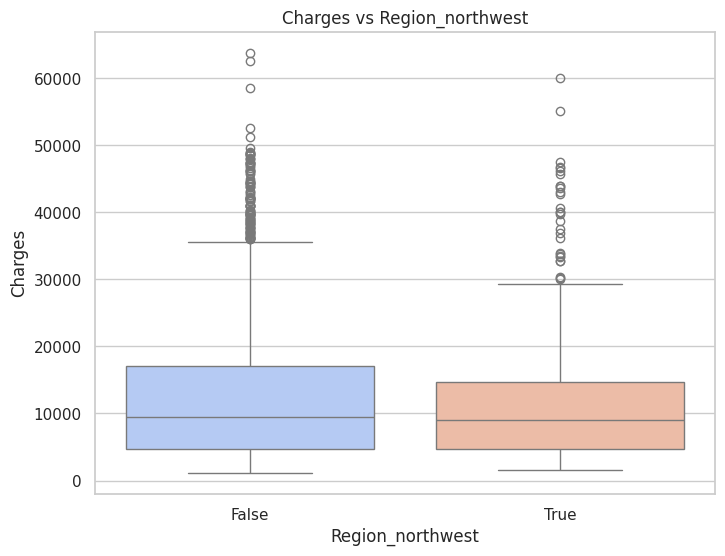

<ipython-input-28-be36d8588b45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['charges'], palette='coolwarm')


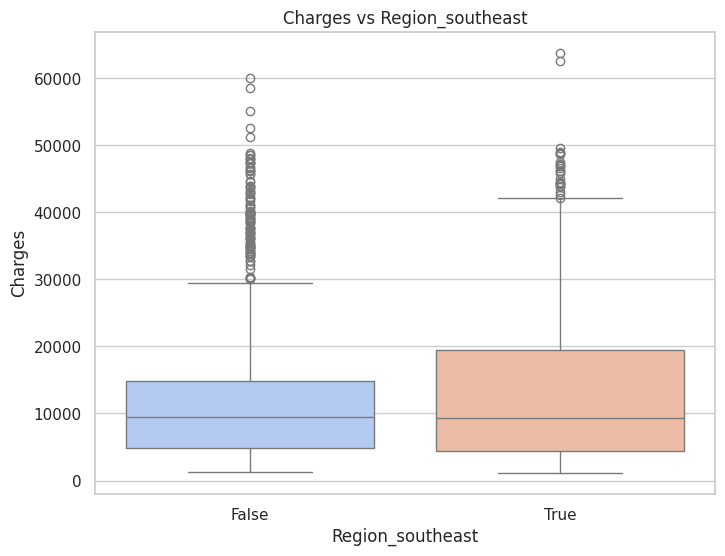

<ipython-input-28-be36d8588b45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['charges'], palette='coolwarm')


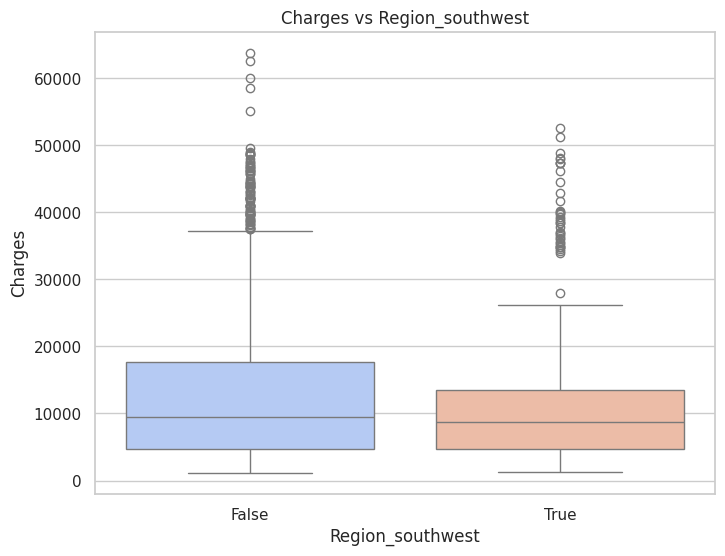

In [28]:
# 3. Box plots for categorical features vs charges
categorical_features = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], y=df['charges'], palette='coolwarm')
    plt.title(f'Charges vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Charges')
    plt.show()



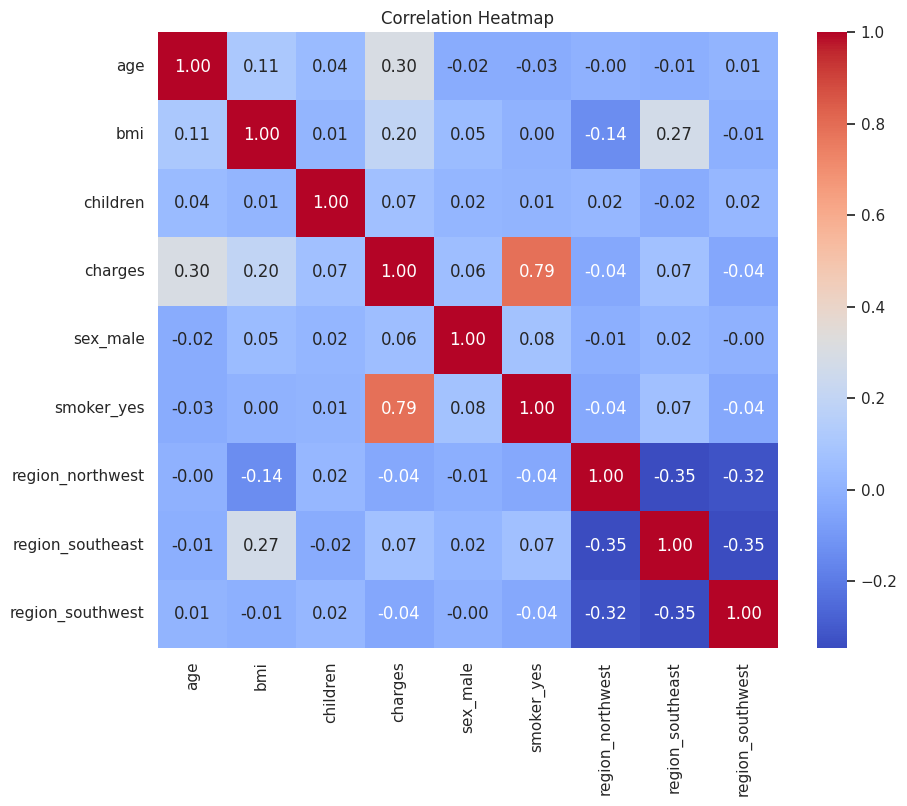

In [27]:
# 4. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#train val and test splitting

In [29]:


# Define features (X) and target variable (y)
X = df.drop('charges', axis=1)  # Features (all columns except 'charges')
y = df['charges']  # Target variable ('charges')

# Step 1: Split the data into training + validation (80%) and testing (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the training + validation set into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Validation set shape: X_val = {X_val.shape}, y_val = {y_val.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set shape: X_train = (856, 8), y_train = (856,)
Validation set shape: X_val = (214, 8), y_val = (214,)
Testing set shape: X_test = (268, 8), y_test = (268,)


In [45]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


#modeling

In [46]:

def train_regression_models(X_train, y_train):
    """
    Train multiple regression models on the training data.

    Parameters:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target variable.

    Returns:
        models (dict): Dictionary of trained models.
    """
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(random_state=42),
        'Lasso Regression': Lasso(random_state=42),
        'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42),
        'LightGBM': LGBMRegressor(random_state=42),
        'CatBoost': CatBoostRegressor(random_state=42, verbose=0),  # Set verbose=0 to suppress output
        'Support Vector Regressor': SVR(),
        'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
        'KNN Regressor': KNeighborsRegressor(n_neighbors=5)
    }

    # Train each model
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)

    return models

In [47]:

def evaluate_model(y_true, y_pred):
    """
    Calculate evaluation metrics for regression models.

    Parameters:
        y_true (pd.Series): True target values.
        y_pred (pd.Series): Predicted target values.

    Returns:
        metrics (dict): Dictionary of evaluation metrics.
    """
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R²': r2_score(y_true, y_pred)
    }
    return metrics

In [48]:
# Train all models
models = train_regression_models(X_train, y_train)

# Evaluate each model on the validation set
results = {}
for name, model in models.items():
    y_val_pred = model.predict(X_val)
    metrics = evaluate_model(y_val, y_val_pred)
    results[name] = metrics
    print(f"\n{name} - Validation Set Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Comparison on Validation Set:")
print(results_df)

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Elastic Net...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 8
[LightGBM] [Info] Start training from score 13185.568183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training CatBoost...
Training Support Vector Regressor...
Training MLP Regressor...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Training KNN Regressor...

Linear Regression - Validation Set Metrics:
MAE: 4486.4791
MSE: 43586925.5882
RMSE: 6602.0395
R²: 0.7268

Ridge Regression - Validation Set Metrics:
MAE: 4501.9600
MSE: 43619882.7618
RMSE: 6604.5350
R²: 0.7266

Lasso Regression - Validation Set Metrics:
MAE: 4486.7261
MSE: 43588952.7817
RMSE: 6602.1930
R²: 0.7268

Elastic Net - Validation Set Metrics:
MAE: 5127.2289
MSE: 49577595.3238
RMSE: 7041.1359
R²: 0.6893

Decision Tree - Validation Set Metrics:
MAE: 3468.4477
MSE: 53000163.9483
RMSE: 7280.1211
R²: 0.6678

Random Forest - Validation Set Metrics:
MAE: 2898.5321
MSE: 30516163.6901
RMSE: 5524.1437
R²: 0.8087

Gradient Boosting - Validation Set Metrics:
MAE: 2912.2484
MSE: 28974808.5914
RMSE: 5382.8253
R²: 0.8184

XGBoost - Validation Set Metrics:
MAE: 3365.7033
MSE: 35439162.2544
RMSE: 5953.0801
R²: 0.7779

LightGBM - Validation Set Metrics:
MAE: 3185.4117
MSE: 32159094.7123
RMSE: 5670.8989
R²: 0.7984

CatBoost - Validation Set Metrics:
MAE: 2985.0367
MSE:

In [49]:
import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Comparison on Validation Set:")
print(results_df)


Model Comparison on Validation Set:
                                  MAE           MSE          RMSE        R²
Linear Regression         4486.479096  4.358693e+07   6602.039502  0.726803
Ridge Regression          4501.960013  4.361988e+07   6604.535015  0.726596
Lasso Regression          4486.726071  4.358895e+07   6602.193028  0.726790
Elastic Net               5127.228934  4.957760e+07   7041.135940  0.689254
Decision Tree             3468.447691  5.300016e+07   7280.121149  0.667802
Random Forest             2898.532103  3.051616e+07   5524.143706  0.808729
Gradient Boosting         2912.248404  2.897481e+07   5382.825335  0.818390
XGBoost                   3365.703268  3.543916e+07   5953.080065  0.777872
LightGBM                  3185.411714  3.215909e+07   5670.898933  0.798431
CatBoost                  2985.036655  3.030395e+07   5504.902555  0.810059
Support Vector Regressor  8838.675300  1.787566e+08  13369.989326 -0.120423
MLP Regressor             3471.457196  3.378631e+07

In [50]:
results_df

,MAE,MSE,RMSE,R²
Linear Regression,4486.479096,4.358693e+07,6602.039502,0.726803
Ridge Regression,4501.960013,4.361988e+07,6604.535015,0.726596
Lasso Regression,4486.726071,4.358895e+07,6602.193028,0.726790
Elastic Net,5127.228934,4.957760e+07,7041.135940,0.689254
Decision Tree,3468.447691,5.300016e+07,7280.121149,0.667802
Random Forest,2898.532103,3.051616e+07,5524.143706,0.808729
Gradient Boosting,2912.248404,2.897481e+07,5382.825335,0.818390
XGBoost,3365.703268,3.543916e+07,5953.080065,0.777872
LightGBM,3185.411714,3.215909e+07,5670.898933,0.798431
CatBoost,2985.036655,3.030395e+07,5504.902555,0.810059


In [51]:
# Select the best model (e.g., Random Forest)
best_model = models['Gradient Boosting']

# Evaluate on the test set
y_test_pred = best_model.predict(X_test)
test_metrics = evaluate_model(y_test, y_test_pred)

# Print test set metrics
print("\nBest Model - Test Set Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")


Best Model - Test Set Metrics:
MAE: 2426.4793
MSE: 19281591.3027
RMSE: 4391.0809
R²: 0.8758


#hyper parameters tuning

In [53]:

# Define the parameter grid
param_grid = {
    'n_estimators': [50,100, 200, 300,400],
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10,15]
}

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 15, 'n_estimators': 400}
Best RMSE: 4380.985597356099


In [54]:
# Initialize the Gradient Boosting model with the best hyperparameters
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Train the model on the training set
best_gb_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_gb_model.predict(X_val)

# Calculate evaluation metrics for the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

# Print validation set metrics
print("Validation Set Metrics with Best Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae_val:.4f}")
print(f"Mean Squared Error (MSE): {mse_val:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")
print(f"R-squared (R²): {r2_val:.4f}")

# Evaluate the model on the test set
y_test_pred = best_gb_model.predict(X_test)

# Calculate evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print test set metrics
print("\nTest Set Metrics with Best Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}")

Validation Set Metrics with Best Hyperparameters:
Mean Absolute Error (MAE): 3003.6769
Mean Squared Error (MSE): 27528163.6657
Root Mean Squared Error (RMSE): 5246.7289
R-squared (R²): 0.8275

Test Set Metrics with Best Hyperparameters:
Mean Absolute Error (MAE): 2537.9931
Mean Squared Error (MSE): 19652134.6615
Root Mean Squared Error (RMSE): 4433.0728
R-squared (R²): 0.8734


In [55]:
train_score = best_gb_model.score(X_train, y_train)
print(f"R² Score on Training Set: {train_score:.4f}")

R² Score on Training Set: 0.8796


In [56]:
val_score = best_gb_model.score(X_val, y_val)
print(f"R² Score on Validation Set: {val_score:.4f}")

R² Score on Validation Set: 0.8275


In [57]:
test_score = best_gb_model.score(X_test, y_test)
print(f"R² Score on Test Set: {test_score:.4f}")

R² Score on Test Set: 0.8734


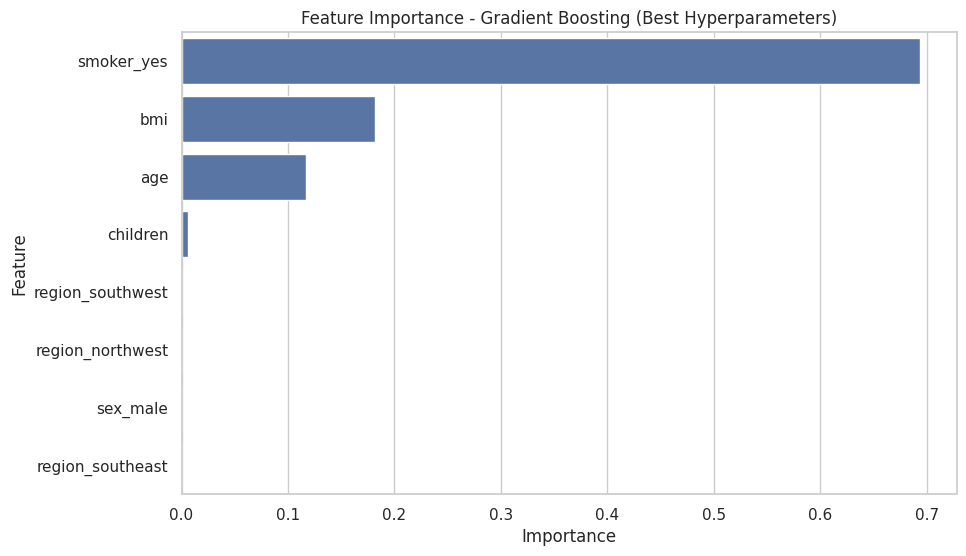

In [58]:

# Get feature importances
importances = best_gb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Gradient Boosting (Best Hyperparameters)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#save the best model

In [59]:

# Save the model to a file
joblib.dump(best_gb_model, 'gradient_boosting_best_model.pkl')

# Load the model (if needed)
# loaded_model = joblib.load('gradient_boosting_best_model.pkl')

['gradient_boosting_best_model.pkl']

#load and test the model with test data

In [60]:

# Load the saved model
loaded_model = joblib.load('gradient_boosting_best_model.pkl')

# Select a single row from the test set (e.g., the first row)
test_data_point = X_test.iloc[0:1]  # Use iloc to select a row and keep it as a DataFrame
print("Test Data Point:")
print(test_data_point)

# Make a prediction
predicted_charges = loaded_model.predict(test_data_point)

# Get the actual target value for the test data point
actual_charges = y_test.iloc[0]

# Print the actual and predicted charges
print(f"Actual Medical Costs: ${actual_charges:.2f}")
print(f"Predicted Medical Costs: ${predicted_charges[0]:.2f}")

Test Data Point:
          age       bmi  children  sex_male  smoker_yes  region_northwest  \
764  0.412467 -0.900341  0.751079     False       False             False   

     region_southeast  region_southwest  
764             False             False  
Actual Medical Costs: $9095.07
Predicted Medical Costs: $10043.59
